#  2 State Folding Fitting Notebook
---

[Author] ERGM

---


## Fitting equilibrium & kinetic folding data to simple models

In this notebook we will show how equilbrium and kinetic folding data can be imported into a notebook and fitted to folding models

---

### Data Format

Datasets should be in .csv files where:

1. The 1st row should contain the data titles
2. the 1st column should contain the x-values 
3. The subsequent columns should contain the y-values. 
4. You can have different data sets in different .csv files or all in one (as long as there is only one x-value column).
5. If you wish to perform global analyses on folding or equilibrium data, the datasets concerned must be in the same .csv
6. Except for global analyses using the Ising model, here each dataset must have its own .csv 

---

Example .csv structure:

[Urea] (M)	 | Fraction Unfolded FKBP12
------------ | ------------------------
0	         | -0.00207
0.267	     | 0.00307
0.533	     | -0.00688
0.8	         | 0.00605
1.07	     | 0.00232
...          | ...

---

#### First off lets load pyfolding & pyplot into this ipython notebook (pyplot allows us to plot more complex figures of our results):

In [1]:
# use this command to tell Jupyter to plot figures inline with the text
%matplotlib inline

# import pyfolding, the pyfolding models and ising models
import pyfolding
from pyfolding import *

# import the package for plotting, call it plt
import matplotlib.pyplot as plt

# import numpy as well
import numpy as np

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


---

#### Now, we need to load some data to analyse.

I will import the equilibrium denaturation & unfolding/folding kinetics of wild-type FKBP12 from:

`2. Main E.R.G., Fulton K.F. & Jackson S.E. (1999) “The folding pathway of FKBP12 and characterisation of the transition state.” Journal of Molecular Biology, 291, 429-444.`

#### Considerations
1. Kinetics data should be entered as rate constants ( *k* ) and NOT as the `log` of the rate constant.
2. There can be no "empty" cells between data points in the .csv file for kinetics data.


In [2]:
# start by loading a data set
# arguments are "path", "filename"

pth = "/Users/ergm/Dropbox/AlanLoweCollaboration/Datasets/FKBP12_Datasets/"
Equilm_FKBP12 = pyfolding.read_equilibrium_data(pth,"Equilm_FKBP12.csv")
Kinetics_FKBP12 = pyfolding.read_kinetic_data(pth,"Kinetics_FKBP12.csv")

---

#### Lets plot the data.

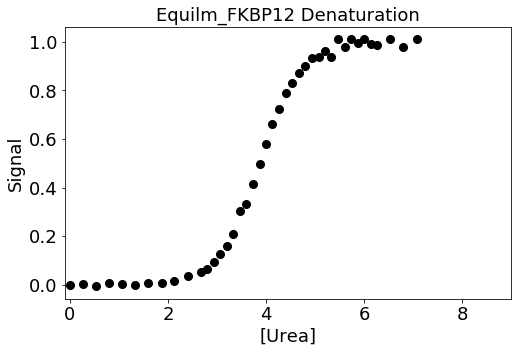

In [3]:
# now plot the equilm data 
Equilm_FKBP12.plot()

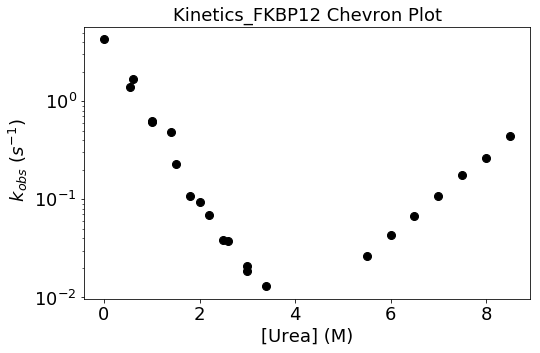

In [4]:
# now the kinetics
Kinetics_FKBP12.plot()

---

#### OK, now we can try fitting the data to protein folding models. 

We will start by fitting the equilibrium data to a two state folding model, without sloping baslines (as the data has been processed as Fraction Unfolded).

#### We can list the models in pyfolding:



In [5]:
# Command imports pyfolding models
from pyfolding.models import *

# command lists models
list_models()

[('CurvedChevronPolynomialFit', 'Verified: False'),
 ('HomozipperIsingEquilibrium', 'Verified: True'),
 ('ParallelTwoStateChevron', 'Verified: False'),
 ('ParallelTwoStateUnfoldingChevron', 'Verified: False'),
 ('TemplateModel', 'Verified: False'),
 ('ThreeStateChevron', 'Verified: True'),
 ('ThreeStateDimericIEquilibrium', 'Verified: False'),
 ('ThreeStateFastPhaseChevron', 'Verified: True'),
 ('ThreeStateMonoIEquilibrium', 'Verified: False'),
 ('ThreeStateSequentialChevron', 'Verified: True'),
 ('TwoStateChevron', 'Verified: True'),
 ('TwoStateChevronMovingTransition', 'Verified: False'),
 ('TwoStateDimerEquilibrium', 'Verified: False'),
 ('TwoStateEquilibrium', 'Verified: True'),
 ('TwoStateEquilibriumSloping', 'Verified: True')]

---
#### We can print out the model for viewing and then print out the variables of the model.



In [6]:
# printing the equation for viewing

models.TwoStateEquilibrium().print_equation()

# as can be seen this model fits data that has been normalised to "faction folded" or "fraction unfolded".

<IPython.core.display.Math object>

In [7]:
# Printing the model variables

# The function has two parts:
# part1 states the model you want to find about: "******()"
# part2 prints the variables: ".fit_func_args"

TwoStateEquilibrium().fit_func_args

['m', 'd50']

---

#### Or we can skip straight to fitting the data.

In [8]:
# Set temperature to 25.00°C
# (NOTE: Careful, this sets the temperature for all subsequent calculations)
pyfolding.set_temperature(25.)

#1st select the fit function and associates it with the data
Equilm_FKBP12.fit_func = models.TwoStateEquilibrium


#then fit it. 
#in the brackets you can define starting values for the variables -
#input in the order printed above with the".fit_func_args'
Equilm_FKBP12.fit(p0=[2,4])

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)
 Fitting results 
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Method: scipy.optimize.curve_fit 

m: 1.43404 ± 0.00003
d50: 3.86730 ± 0.00001
--------------------------------------------------
R^2: 0.99933


---

#### We can print the resultant graph:
We will need a slightly different command as we need to plot the data and the curve on the same graph

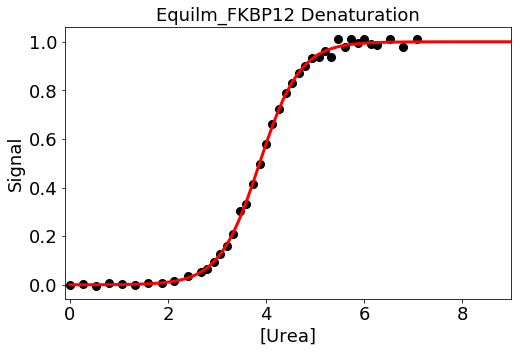

In [9]:
Equilm_FKBP12.plot()

In [10]:
# Set temperature to 25.00°C
# (NOTE: Careful, this sets the temperature for all subsequent calculations)
pyfolding.set_temperature(25.)

# We can also fit the data to the Two State Equilm model that has denaturant linear dependent Native & Denatured Baselines: 
Equilm_FKBP12.fit_func = models.TwoStateEquilibrium

# printing the equation for viewing
models.TwoStateEquilibrium().print_equation()

#then fit it. 
#in the brackets you can define starting values for the variables -
#in this case I have just left them as the default.
Equilm_FKBP12.fit()

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)


<IPython.core.display.Math object>

 Fitting results 
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Method: scipy.optimize.curve_fit 

m: 1.43404 ± 0.00003
d50: 3.86730 ± 0.00001
--------------------------------------------------
R^2: 0.99933


---

#### We can fit the kinetic data separately too:


In [11]:
# select the fit function
Kinetics_FKBP12.fit_func = models.TwoStateChevron

TwoStateChevron().fit_func_args

['kf', 'mf', 'ku', 'mu']

In [12]:
# printing the equation for viewing
models.TwoStateChevron().print_equation()


<IPython.core.display.Math object>

In [13]:
# 1st select the fit function and associates it with the data
Kinetics_FKBP12.fit_func = models.TwoStateChevron

# 2nd fit the data with initial values
Kinetics_FKBP12.fit(p0=[4,2,0.0001,1])

 Fitting results 
ID: Kinetics_FKBP12
Model: TwoStateChevron
Method: scipy.optimize.curve_fit 

kf: 4.21728 ± 0.00625
mf: 1.86223 ± 0.00082
ku: 0.00019 ± 0.00000
mu: 0.90557 ± 0.00094
--------------------------------------------------
R^2: 0.99199


---

#### We can print the resultant graph:
This is similar to the equilm but we need to remember to use a natural log plot with kinetics dataset and fit.

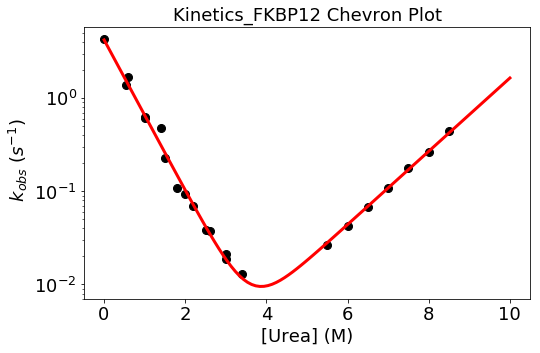

In [14]:
pyfolding.plot_chevron(Kinetics_FKBP12)

---

#### We can also plot a fancier graph that shows both Equilm and Kinetics together

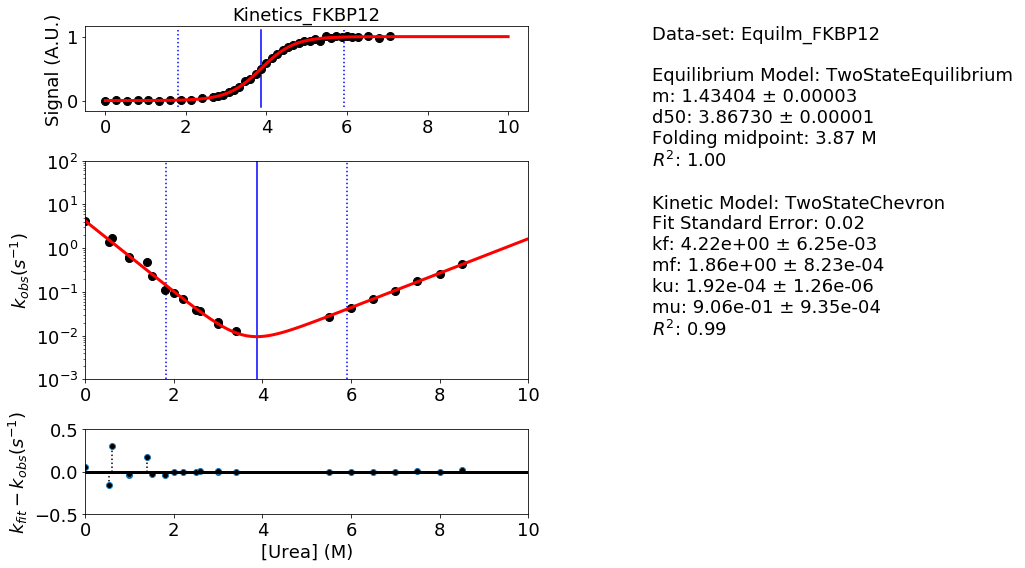

In [15]:
pyfolding.plot_figure(Equilm_FKBP12, Kinetics_FKBP12, display=True)

#### Saving out the fit results as a .CSV

In [16]:
# save out the data
Equilm_FKBP12.save_fit('/Users/ergm/Desktop/test.csv')


Writing .csv file (/Users/ergm/Desktop/test.csv)...


### Fit to multiple models

 Fitting results 
ID: Equilm_FKBP12
Model: TwoStateEquilibrium
Method: scipy.optimize.curve_fit 

m: 1.43404 ± 0.00003
d50: 3.86730 ± 0.00001
--------------------------------------------------
R^2: 0.99933


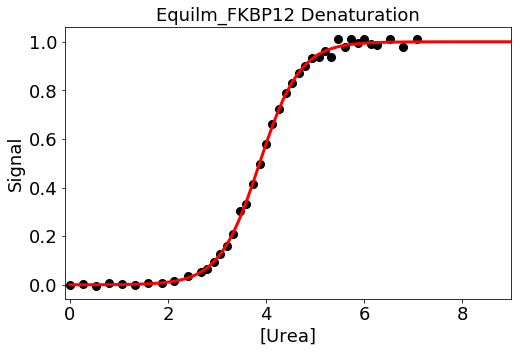

 Fitting results 
ID: Equilm_FKBP12
Model: TwoStateEquilibriumSloping
Method: scipy.optimize.curve_fit 

alpha_f: -0.00000 ± 0.00001
beta_f: -0.00005 ± 0.00001
alpha_u: 0.99945 ± 0.00007
beta_u: 0.00035 ± 0.00001
m: 1.43029 ± 0.00008
d50: 3.86799 ± 0.00003
--------------------------------------------------
R^2: 0.99933


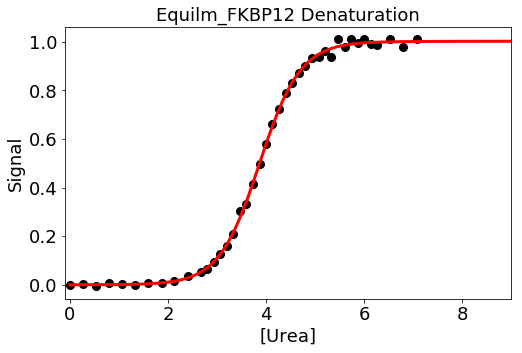

In [18]:
# make a list of models to be used to fit
models_to_fit = [models.TwoStateEquilibrium, 
                 models.TwoStateEquilibriumSloping]

# and now lets fit them
for model in models_to_fit:
    Equilm_FKBP12.fit_func = model
    Equilm_FKBP12.fit()   
    Equilm_FKBP12.plot()

---

### End of this Notebook.

---